## Gaussian Support Vector Machines

using dataset:
    
    ex6data1.mat - Example Dataset 1
    
    ex6data2.mat - Example Dataset 2
    
    ex6data3.mat - Example Dataset 3
    
    spamTrain.mat - Spam training set
    
    spamTest.mat - Spam test set
    
    emailSample1.txt - Sample email 1
    
    emailSample2.txt - Sample email 2
    
    spamSample1.txt - Sample spam 1
    
    spamSample2.txt - Sample spam 2
    
    vocab.txt - Vocabulary list

In this part,you will be using SVMs to do non-linear classification.

You will be using SVMs with $Gaussiankernels$

### 1.1 Examples Dataset 2

using ex6data2.mat

Gaussian Kernel is defined as:

$K_{gaussian}(x^{(i)},x^{(j)})=exp({-\frac{||x^{(i)}-x^{(j)}||^{2}}{2\sigma^{2}}})$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
def GaussinaKernel(x1,x2,sigma):
    return np.exp(-np.power(x1-x2,2).sum()/(2*sigma**2))

In [3]:
#Initialization
x1=np.array([1,2,1])
x2=np.array([0,4,-1])
sigma=2

GaussinaKernel(x1,x2,sigma)

0.32465246735834974

In [4]:
from scipy.io import loadmat

dataSet=loadmat('ex6data2.mat')

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
def plotData(dataSet):
    
    data=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data['y']=dataSet.get('y')
    
    positive=data[data['y'].isin([0])]
    negative=data[data['y'].isin([1])]
    
    plt.figure(figsize=(12,8))
    plt.tick_params(direction='in',labelsize=10)

    
    plt.scatter(positive['X1'],positive['X2'],c='yellow',marker='o', edgecolors='black')
    plt.scatter(negative['X1'],negative['X2'],c='black',marker='+')
    
    plt.show()

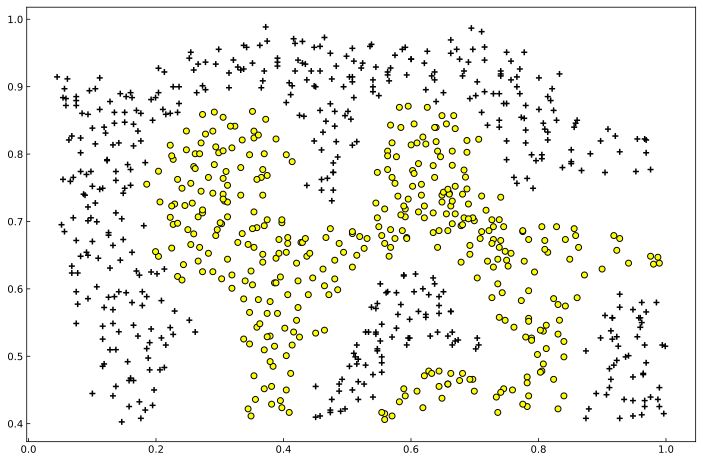

In [6]:
plotData(dataSet)

use sklern to compute param

In [7]:
from sklearn.svm import SVC

def GaussianSVM(dataSet):
    data=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data['y']=dataSet.get('y')
    
    svc=SVC(C=100,kernel='rbf',gamma=10,probability=True)
    svc.fit(data[['X1','X2']],data['y'])
    print("Gaussian Score:{}".format(svc.score(data[['X1','X2']],data['y'])))
    
    return svc

In [8]:
svc=GaussianSVM(dataSet)

Gaussian Score:0.9698725376593279


In [9]:
def plot_decision_boundary(svc, X):
    x_min, x_max = X[:,0].min()*1.2, X[:,0].max()*1.2
    y_min, y_max = X[:,1].min()*1.1,X[:,1].max()*1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,colors='blue')

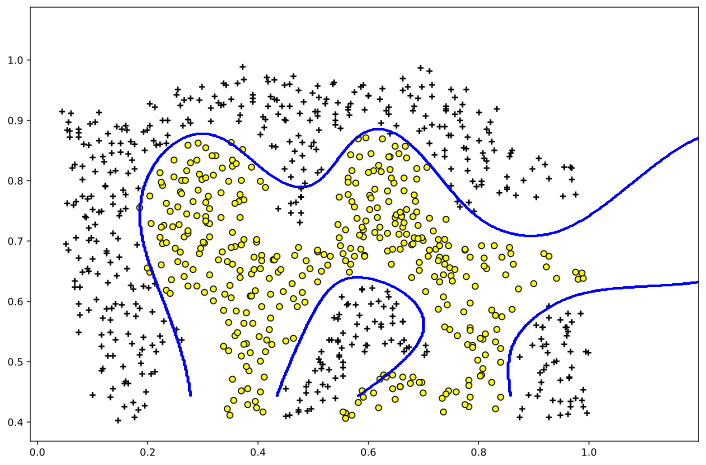

In [10]:
def plotData(dataSet,svc):
    
    data=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data['y']=dataSet.get('y')
    
    positive=data[data['y'].isin([0])]
    negative=data[data['y'].isin([1])]
    
    plt.figure(figsize=(12,8))
    
    plt.scatter(positive['X1'],positive['X2'],c='yellow',marker='o', edgecolors='black')
    plt.scatter(negative['X1'],negative['X2'],c='black',marker='+')
    
    predict_prob=svc.predict_proba(data[['X1','X2']])
    
    plot_decision_boundary(svc,dataSet.get('X'))
    plt.show()
plotData(dataSet,svc)